In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('Downloads\Employee.csv')

In [3]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
df.shape

(74498, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [6]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74498.000000,74498.000000,74498.000000,74498.000000,74493.000000,74498.000000,74492.000000,74498.000000
mean,37249.500000,38.529746,15.721603,7299.379514,0.832978,49.991584,1.650365,55.727456
std,21505.864514,12.083456,11.223744,2152.508566,0.995303,28.513611,1.553660,25.399349
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18625.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37249.500000,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,55873.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [7]:
# finding the missing values
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [8]:
# there are multiple missing values in different fields in the dataset
df.fillna(0, inplace=True)

In [9]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [10]:
#checking duplicate records
df.duplicated().sum()

0

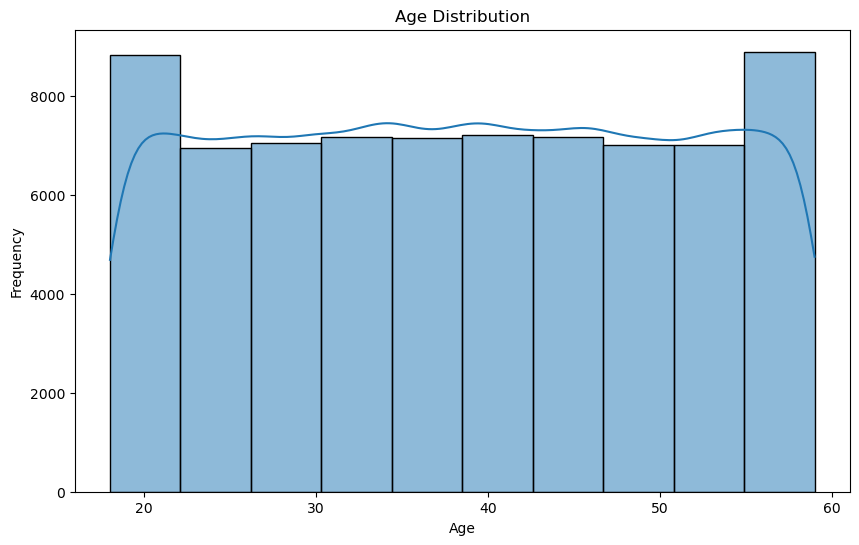

In [11]:
# Exploratory Data Analysis
# Visualize the distribution of numerical features

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

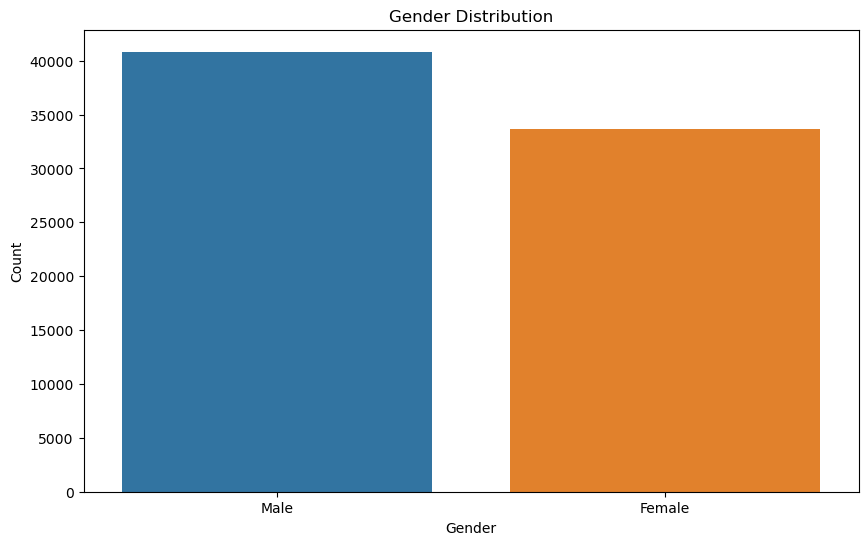

In [12]:
# Visualizing the distribution of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

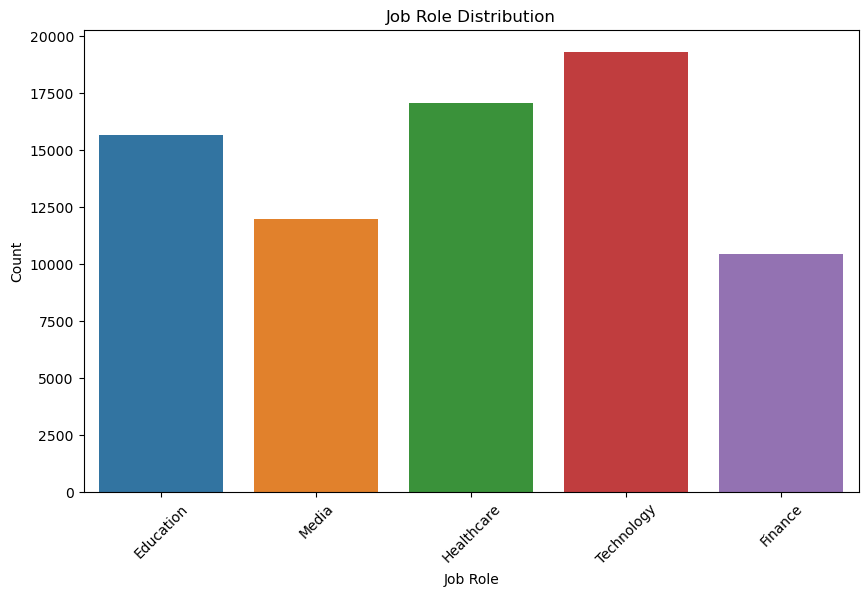

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job Role')
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

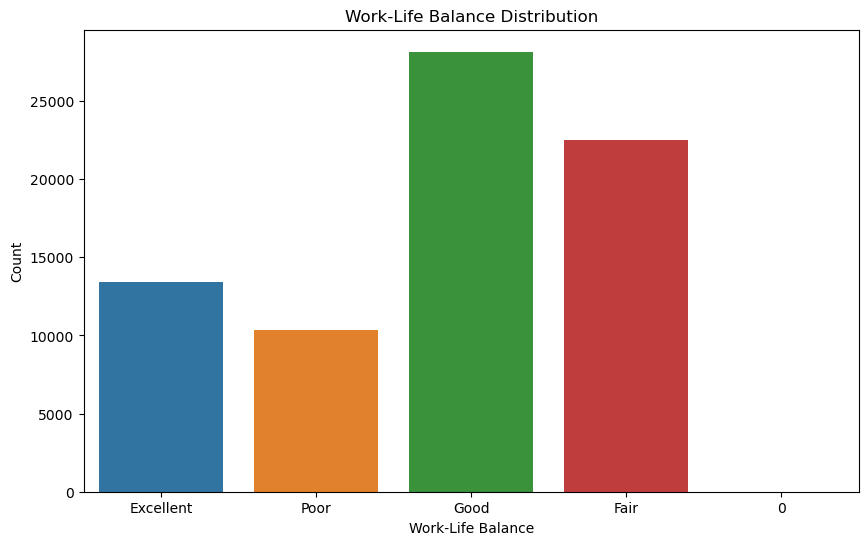

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Work-Life Balance')
plt.title('Work-Life Balance Distribution')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count')
plt.show()

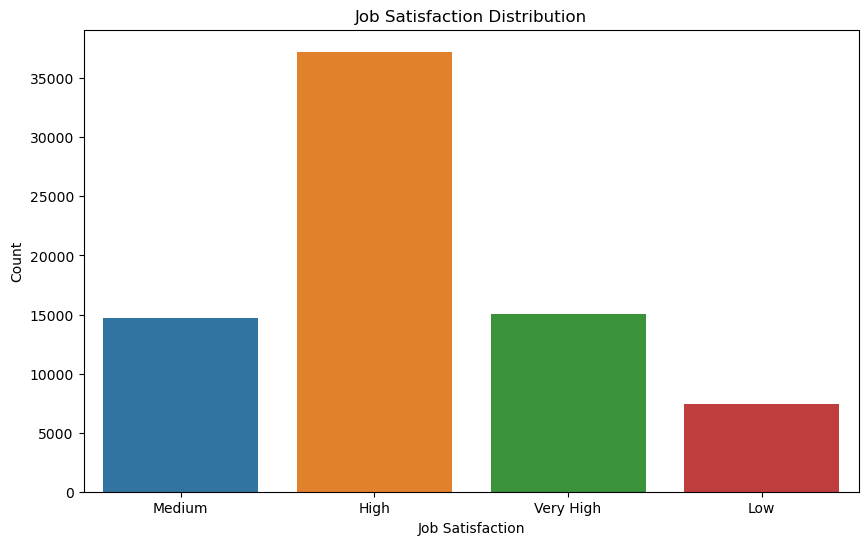

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job Satisfaction')
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

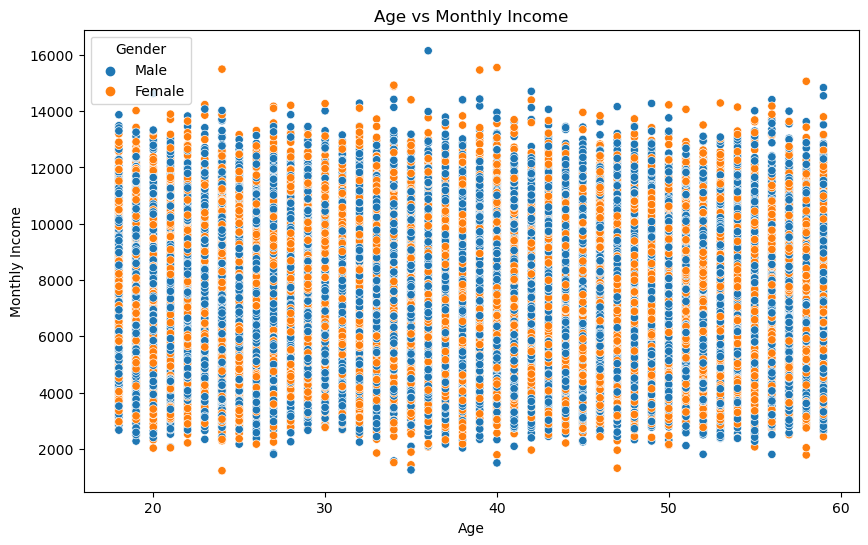

In [16]:
# Visualizing relationships between features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Monthly Income', hue='Gender')
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

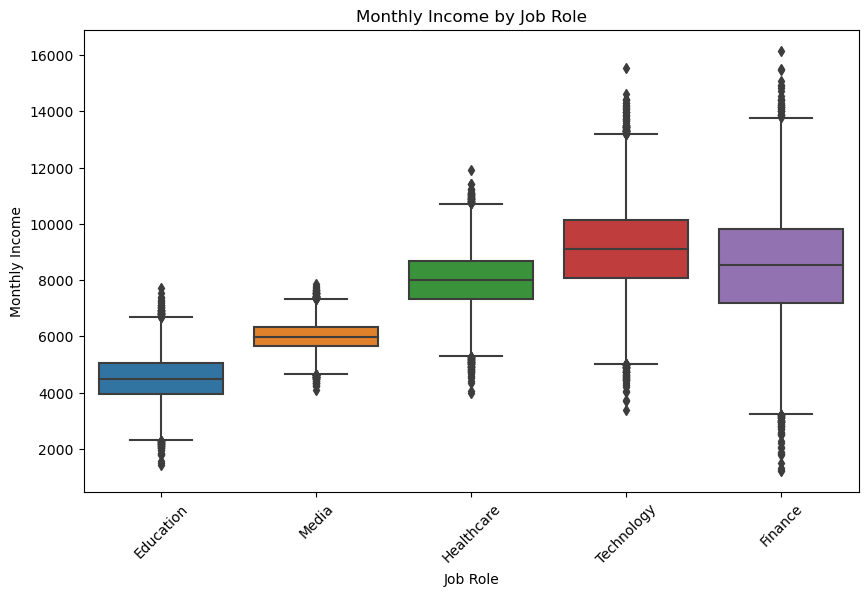

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Job Role', y='Monthly Income')
plt.title('Monthly Income by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

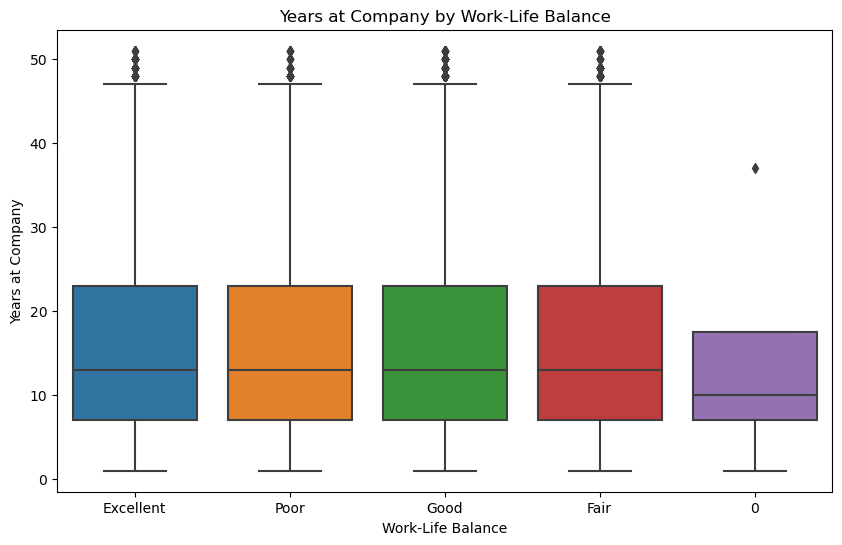

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Work-Life Balance', y='Years at Company')
plt.title('Years at Company by Work-Life Balance')
plt.xlabel('Work-Life Balance')
plt.ylabel('Years at Company')
plt.show()

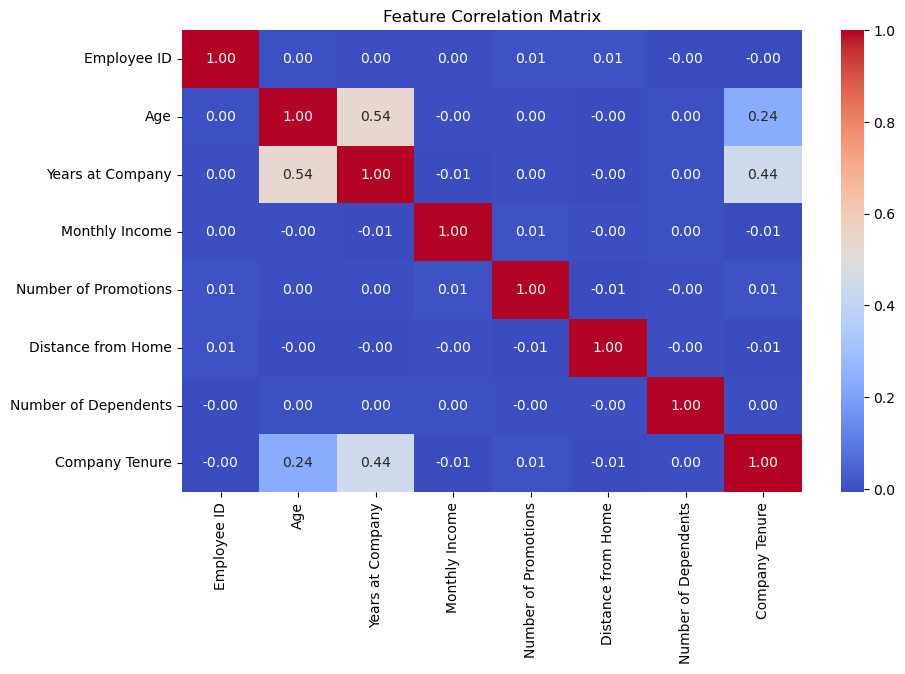

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

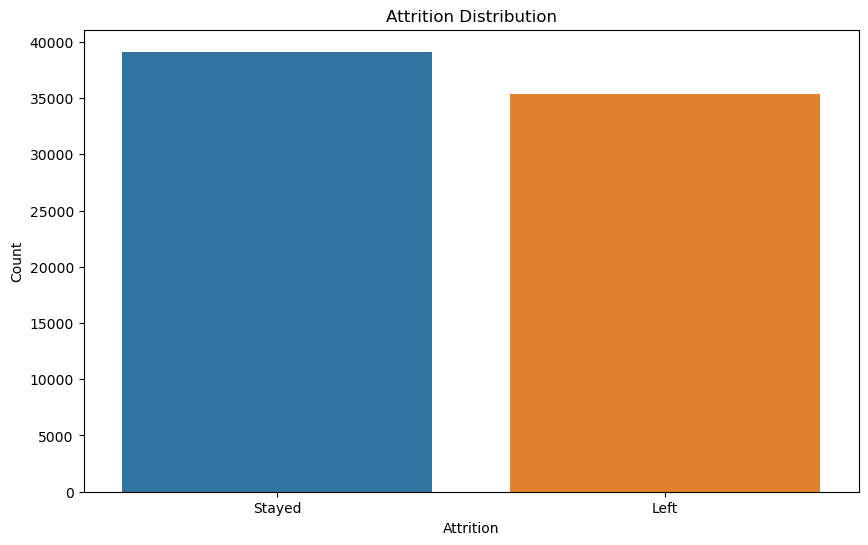

In [20]:
# Visualizing attrition rates
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [21]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+':'+str(df[column].unique()))
        print(df[column].value_counts())

Gender:['Male' 'Female']
Gender
Male      40826
Female    33672
Name: count, dtype: int64
Job Role:['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Job Role
Technology    19322
Healthcare    17074
Education     15658
Media         11996
Finance       10448
Name: count, dtype: int64
Work-Life Balance:['Excellent' 'Poor' 'Good' 'Fair' 0]
Work-Life Balance
Good         28157
Fair         22528
Excellent    13431
Poor         10378
0                4
Name: count, dtype: int64
Job Satisfaction:['Medium' 'High' 'Very High' 'Low']
Job Satisfaction
High         37245
Very High    15079
Medium       14717
Low           7457
Name: count, dtype: int64
Performance Rating:['Average' 'Low' 'High' 'Below Average' 0]
Performance Rating
Average          44716
High             14910
Below Average    11139
Low               3729
0                    4
Name: count, dtype: int64
Overtime:['No' 'Yes']
Overtime
No     50157
Yes    24341
Name: count, dtype: int64
Education Level:['Associate Degree' '

In [22]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [23]:
df=df.drop(['Employee ID','Gender','Age','Number of Promotions','Number of Dependents','Job Role'],axis=1)

In [24]:
# Convert all categorical values to strings
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)

In [25]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [26]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [27]:
# Data Modeling
# Split the dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle
# Define the models
models = {
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier()
    
}

In [29]:
# Train and evaluate the models
for name, model in models.items():
    model = model
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(name, accuracy_score(y_test, prediction))

Random Forest 0.7338255033557047
SVC 0.7308724832214765
Logistic Regression 0.7102684563758389
Decision Tree 0.6504697986577181


In [34]:
# Model Fine-tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Best parameters and model evaluation
best_rf_model = grid_search.best_estimator()
y_pred_best = best_rfc.predict(X_test)
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [31]:
# Fiting randomforest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
#Save the Model
prediction = rfc.predict(X_test)
print(rfc, accuracy_score(y_test, prediction))
pickle.dump(rfc,open('model.pkl','wb'))

RandomForestClassifier() 0.7320134228187919
